Limpieza para datos generales de 2025 2'24 y ultimas 52 semanas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


Cargar datasets

In [ ]:
# Ruta de entrada y salida
carpeta_entrada = 'Estadisticas_2024'

Vamos a centrarnos en un unico csv ya que todos los de la carpeta contienen las mismas variables

In [44]:
ruta_csv = 'Estadisticas_2024/stats_Hard.csv'

# Leer el CSV
df = pd.read_csv(ruta_csv)

# Mostrar las columnas disponibles 1 debajo de otra
print("Variables disponibles en el dataset:")
for col in df.columns:
    print(col)

Variables disponibles en el dataset:
Rk
Player
M
M W-L
M W%
SPW
SPW-InP
Aces
Ace%
DFs
DF%
DF/2s
1stIn
1st%
2nd%
2%-InP
Hld%
Pts/SG
PtsL/SG
Player_dup
M_dup
RPW
RPW-InP
vAce%
vDF%
v1st%
v2nd%
Brk%
Pts/RG
PtsW/RG
MdOppRk
MnOppRk
Player_dup.1
M_dup.1
BPConv%
BPConv
BPChnc
BP/G
BP/S
BP/M
Bks/S
Bks/M
BPSvd%
BPSaved
BPvs
BPvs/G
BPvs/S
BPvs/M
Bkn/S
Bkn/M
Player_dup.2
M_dup.2
DR
Points
TPW%
TBs
TB W-L
TB W%
TB/S
Sets
Set W-L
S W%
Gms
Game W-L
G W%
Time/Mt
Min/Set
Sec/Pt


In [46]:
#quiero ver los valores nulos en cada columna en el dataset con un bucle
print("\nValores nulos en el dataset:")
for col in df.columns:
    nulos = df[col].isnull().sum()
    print(f"{col}: {nulos} nulos")


Valores nulos en el dataset:
Rk: 0 nulos
Player: 0 nulos
M: 0 nulos
M W-L: 0 nulos
M W%: 0 nulos
SPW: 0 nulos
SPW-InP: 0 nulos
Aces: 0 nulos
Ace%: 0 nulos
DFs: 0 nulos
DF%: 0 nulos
DF/2s: 0 nulos
1stIn: 0 nulos
1st%: 0 nulos
2nd%: 0 nulos
2%-InP: 0 nulos
Hld%: 0 nulos
Pts/SG: 0 nulos
PtsL/SG: 0 nulos
Player_dup: 0 nulos
M_dup: 0 nulos
RPW: 0 nulos
RPW-InP: 0 nulos
vAce%: 0 nulos
vDF%: 0 nulos
v1st%: 0 nulos
v2nd%: 0 nulos
Brk%: 0 nulos
Pts/RG: 0 nulos
PtsW/RG: 0 nulos
MdOppRk: 0 nulos
MnOppRk: 0 nulos
Player_dup.1: 0 nulos
M_dup.1: 0 nulos
BPConv%: 0 nulos
BPConv: 0 nulos
BPChnc: 0 nulos
BP/G: 0 nulos
BP/S: 0 nulos
BP/M: 0 nulos
Bks/S: 0 nulos
Bks/M: 0 nulos
BPSvd%: 0 nulos
BPSaved: 0 nulos
BPvs: 0 nulos
BPvs/G: 0 nulos
BPvs/S: 0 nulos
BPvs/M: 0 nulos
Bkn/S: 0 nulos
Bkn/M: 0 nulos
Player_dup.2: 0 nulos
M_dup.2: 0 nulos
DR: 0 nulos
Points: 0 nulos
TPW%: 0 nulos
TBs: 0 nulos
TB W-L: 0 nulos
TB W%: 0 nulos
TB/S: 0 nulos
Sets: 0 nulos
Set W-L: 0 nulos
S W%: 0 nulos
Gms: 0 nulos
Game W-L: 

In [48]:
#quiero ver el tipo de dato de cada columna en el dataset con bucle
print("\nTipos de datos en el dataset:")
for col in df.columns:
    tipo_dato = df[col].dtype
    print(f"{col}: {tipo_dato}")


Tipos de datos en el dataset:
Rk: int64
Player: object
M: int64
M W-L: object
M W%: object
SPW: object
SPW-InP: object
Aces: int64
Ace%: object
DFs: int64
DF%: object
DF/2s: object
1stIn: object
1st%: object
2nd%: object
2%-InP: object
Hld%: object
Pts/SG: float64
PtsL/SG: float64
Player_dup: object
M_dup: int64
RPW: object
RPW-InP: object
vAce%: object
vDF%: object
v1st%: object
v2nd%: object
Brk%: object
Pts/RG: float64
PtsW/RG: float64
MdOppRk: float64
MnOppRk: float64
Player_dup.1: object
M_dup.1: int64
BPConv%: object
BPConv: int64
BPChnc: int64
BP/G: float64
BP/S: float64
BP/M: float64
Bks/S: float64
Bks/M: float64
BPSvd%: object
BPSaved: int64
BPvs: int64
BPvs/G: float64
BPvs/S: float64
BPvs/M: float64
Bkn/S: float64
Bkn/M: float64
Player_dup.2: object
M_dup.2: int64
DR: float64
Points: int64
TPW%: object
TBs: int64
TB W-L: object
TB W%: object
TB/S: object
Sets: int64
Set W-L: object
S W%: object
Gms: int64
Game W-L: object
G W%: object
Time/Mt: object
Min/Set: float64
Sec/Pt:

debemos convertir las columnas que son de tipo object a numerico

En este momento ya podemos descartar algunas variables porque estan expresadas de mas de 1 manera y nos quedaremos unicamente con la que mas no interesa.
En ese caso descartamos: 
M W-L y nos quedamos con M W%
Aces y nos quedamos con Aces% para comparar con vAces%
DFs y nos quedamos con DF%
ptsl
pts
pts2
ptsw
mdopp
mnopp
BPConv y nos quedamos con BPConv%
BPSaved y nos quedamos con BPSvd%
BPvs y nos quedamos con BPvs/G, BPvs/S y BP/M
DR porque no es una variable de estadisticas, es una variable tranformada
points
TB W-L y nos quedamos con TB W%
TBs 
TB/S???
Sets???
Set W-L y nos quedamos con S W%
Gms???
Game W-L y nos quedamos con G W%
Time vamos a eliminar las estadisticas de tiempo ya que no son relevantes para nuesto modelo, no son caracteristicas de un tenista y pueden ser muy variables
min
sec

In [49]:

# Ruta de entrada y salida
carpeta_entrada = 'Estadisticas_2024'
carpeta_salida = 'Estadisticas_2024_limpio_2'

# Crear carpeta de salida si no existe
os.makedirs(carpeta_salida, exist_ok=True)

# Lista de columnas que deseas eliminar (puedes modificarla)
columnas_a_eliminar = ['Player_dup', 'M_dup', 'M W-L', 'Aces', 'DFs', 'BPConv', 'BPSaved', 'BPvs', 'DR', 'TB W-L', 'Set W-L', 'Game W-L', 'Time/Mt','Min/Set', 'Sec/Pt'  ]
# 68-34= 34 columnas
# Procesar cada archivo CSV
# Procesar cada archivo CSV
for archivo in os.listdir(carpeta_entrada):
    if archivo.endswith('.csv'):
        ruta_entrada = os.path.join(carpeta_entrada, archivo)
        ruta_salida = os.path.join(carpeta_salida, archivo)

        # Leer CSV
        df = pd.read_csv(ruta_entrada)

        # Eliminar columnas duplicadas por nombre (quedarse con la primera)
        df = df.loc[:, ~df.columns.duplicated()]

        # Eliminar columnas con sufijos .1, .2, etc. (que vienen de duplicados)
        df = df.loc[:, ~df.columns.str.contains(r'\.\d+$')]

        # Limpieza de columnas y espacios
        df.columns = df.columns.str.strip()
        df = df.apply(lambda col: col.map(lambda x: x.strip() if isinstance(x, str) else x))

        # Reemplazar símbolos
        df = df.replace({'%': '', ',': '.'}, regex=True)

        # Convertir columnas a numérico donde sea posible
        for col in df.columns:
            try:
                df[col] = pd.to_numeric(df[col])
            except Exception:
                pass  # No se puede convertir, se deja como está
        

        # Eliminar columnas no deseadas si existen
        df = df.drop(columns=[col for col in columnas_a_eliminar if col in df.columns])

        # Limpiar la columna 'Player' quitando la nacionalidad entre corchetes
        if 'Player' in df.columns:
            df['Player'] = df['Player'].str.replace(r'\s*\[.*?\]', '', regex=True).str.strip()


        # Guardar el CSV limpio
        # df.to_csv(ruta_salida, index=False)
        # print(f'Archivo limpio guardado: {ruta_salida}')


In [33]:
print("Variables disponibles en el dataset:")
for col in df.columns:
    print(col)

Variables disponibles en el dataset:
Rk
Player
M
M W%
SPW
SPW-InP
Ace%
DF%
DF/2s
1stIn
1st%
2nd%
2%-InP
Hld%
Pts/SG
PtsL/SG
RPW
RPW-InP
vAce%
vDF%
v1st%
v2nd%
Brk%
Pts/RG
PtsW/RG
MdOppRk
MnOppRk
BPConv%
BPChnc
BP/G
BP/S
BP/M
Bks/S
Bks/M
BPSvd%
BPvs/G
BPvs/S
BPvs/M
Bkn/S
Bkn/M
Points
TPW%
TBs
TB W%
TB/S
Sets
S W%
Gms
G W%


In [51]:
numericas = df.select_dtypes(include='number')


# Función para contar outliers por columna
def contar_outliers(col):
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    limite_inf = q1 - 1.5 * iqr
    limite_sup = q3 + 1.5 * iqr
    outliers = col[(col < limite_inf) | (col > limite_sup)]
    return len(outliers)

# Aplicar a todas las columnas numéricas
outlier_counts = numericas.apply(contar_outliers).sort_values(ascending=False)

# Mostrar variables con más outliers
print("Cantidad de outliers por variable:")
print(outlier_counts)

Cantidad de outliers por variable:
MnOppRk    8
TPW%       7
G W%       6
BPConv%    6
Hld%       5
Bkn/S      5
MdOppRk    5
vDF%       4
BPChnc     4
DF/2s      4
DF%        4
Pts/RG     4
S W%       4
Bkn/M      4
SPW        3
BPvs/M     3
BPSvd%     3
Ace%       3
BPvs/G     2
BP/G       2
2nd%       2
2%-InP     2
PtsL/SG    2
SPW-InP    2
M          2
vAce%      2
RPW-InP    2
1st%       2
PtsW/RG    2
M W%       1
1stIn      1
Sets       1
Pts/SG     1
TB/S       1
TBs        1
v2nd%      1
v1st%      1
Brk%       1
BP/S       1
BPvs/S     1
Gms        1
Points     1
Rk         0
BP/M       0
RPW        0
Bks/M      0
Bks/S      0
dtype: int64


In [50]:
#quiero ver el tipo de dato de cada columna en el dataset con bucle
print("\nTipos de datos en el dataset:")
for col in df.columns:
    tipo_dato = df[col].dtype
    print(f"{col}: {tipo_dato}")


Tipos de datos en el dataset:
Rk: int64
Player: object
M: int64
M W%: float64
SPW: float64
SPW-InP: float64
Ace%: float64
DF%: float64
DF/2s: float64
1stIn: float64
1st%: float64
2nd%: float64
2%-InP: float64
Hld%: float64
Pts/SG: float64
PtsL/SG: float64
RPW: float64
RPW-InP: float64
vAce%: float64
vDF%: float64
v1st%: float64
v2nd%: float64
Brk%: float64
Pts/RG: float64
PtsW/RG: float64
MdOppRk: float64
MnOppRk: float64
BPConv%: float64
BPChnc: int64
BP/G: float64
BP/S: float64
BP/M: float64
Bks/S: float64
Bks/M: float64
BPSvd%: float64
BPvs/G: float64
BPvs/S: float64
BPvs/M: float64
Bkn/S: float64
Bkn/M: float64
Points: int64
TPW%: float64
TBs: int64
TB W%: object
TB/S: float64
Sets: int64
S W%: float64
Gms: int64
G W%: float64


ahora ya tenemos las columnas en formato numerico, necesario para poder hacer analisis, tras esta primera conversion podemos descartar las siguientes columnas:
En este momento ya podemos descartar algunas variables porque estan expresadas de mas de 1 manera y nos quedaremos unicamente con la que mas no interesa.
En ese caso descartamos: 
M W-L y nos quedamos con M W%
Aces y nos quedamos con Aces% para comparar con vAces%
DFs y nos quedamos con DF%
ptsl
pts
pts2
ptsw
mdopp
mnopp
BPConv y nos quedamos con BPConv%
BPSaved y nos quedamos con BPSvd%
BPvs y nos quedamos con BPvs/G, BPvs/S y BP/M
DR porque no es una variable de estadisticas, es una variable tranformada
points
TB W-L y nos quedamos con TB W%
TBs 
TB/S???
Sets???
Set W-L y nos quedamos con S W%
Gms???
Game W-L y nos quedamos con G W%
Time vamos a eliminar las estadisticas de tiempo ya que no son relevantes para nuesto modelo, no son caracteristicas de un tenista y pueden ser muy variables
min
sec


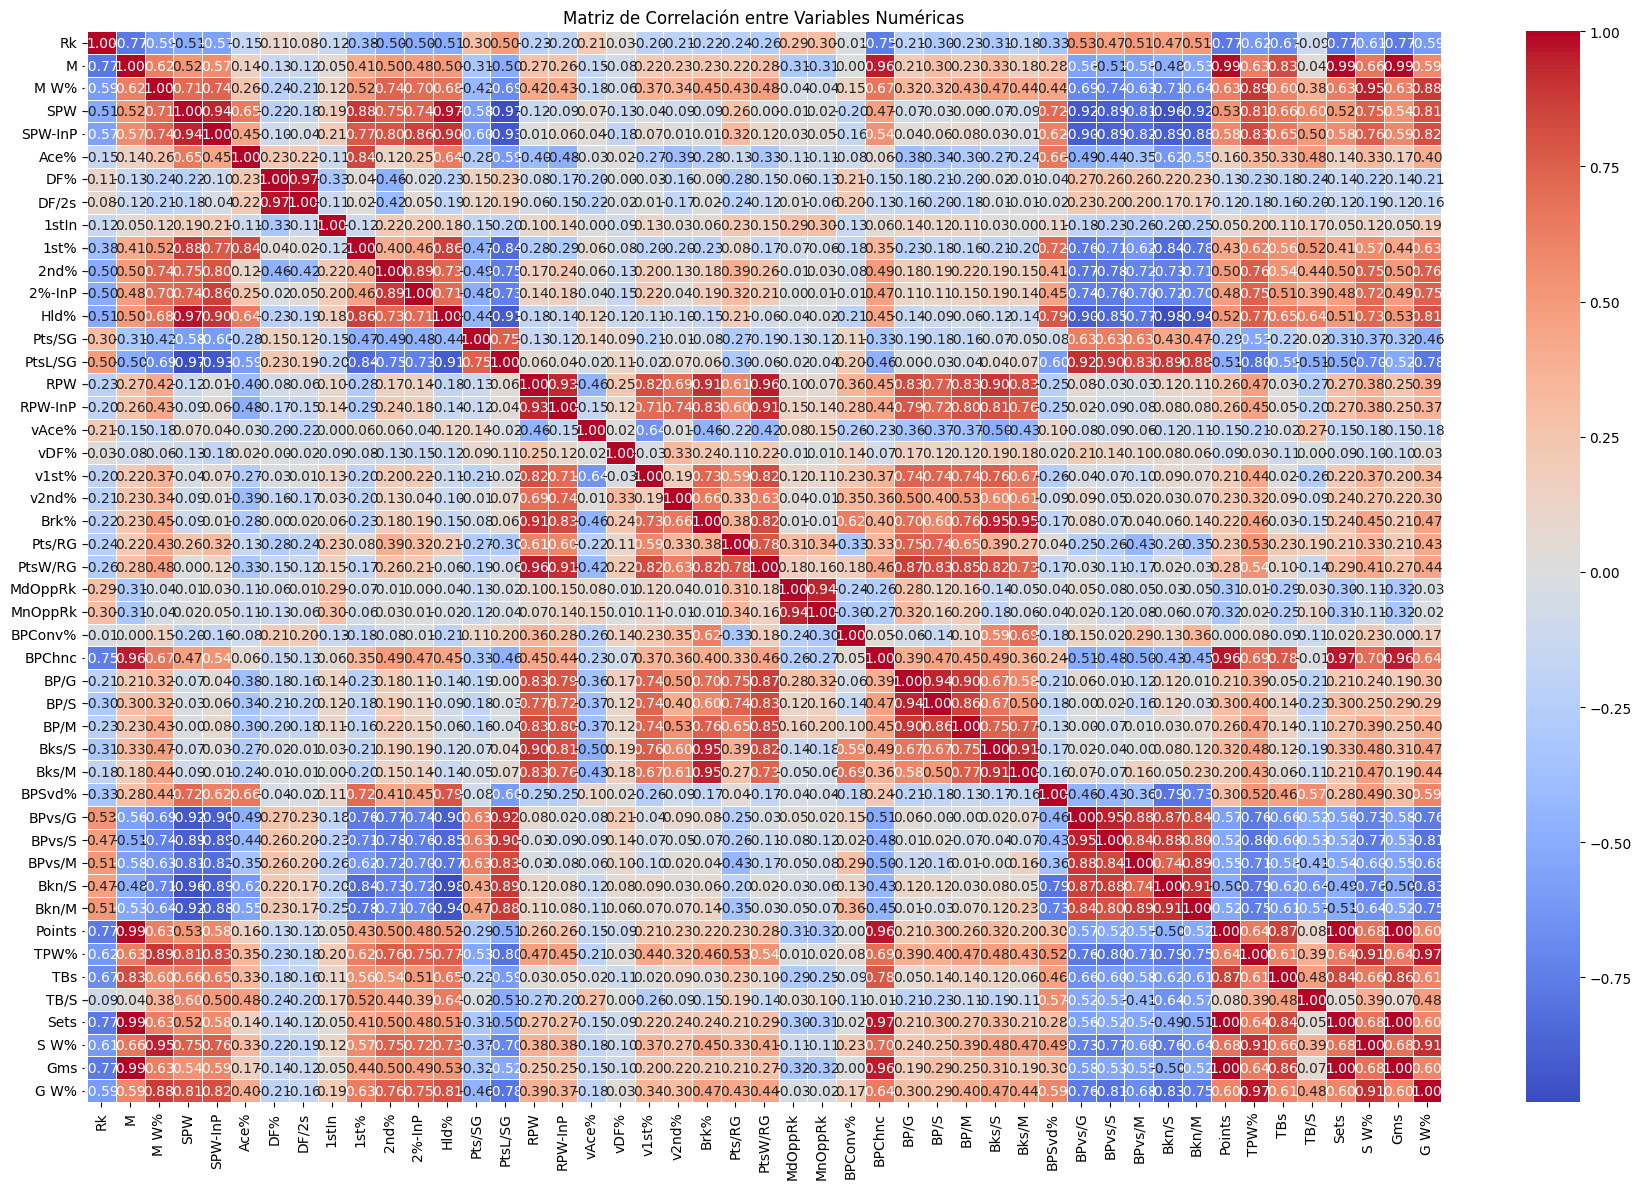

In [34]:
# Cargar el archivo
# df = pd.read_csv("Estadisticas_2024_limpio_2/estadisticas_generales_2024.csv")

# Eliminar columnas no numéricas o que contienen valores no convertibles directamente
df_clean = df.copy()

# # Quitar el símbolo '%' y convertir a float donde sea necesario
# df_clean = df_clean.replace('%', '', regex=True)

# # Convertir columnas relevantes a numéricas si es posible
# for col in df_clean.columns:
#     try:
#         df_clean[col] = pd.to_numeric(df_clean[col])
#     except:
#         pass  # Mantener columnas que no pueden convertirse (como nombres de jugadores)

# Seleccionar solo columnas numéricas
df_numeric = df_clean.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
corr_matrix = df_numeric.corr()

# Dibujar el mapa de calor
plt.figure(figsize=(18, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.tight_layout()
plt.show()

PtsL/SG esta altamente relacionada con variables que si vamos a tener en cuenta como  BPvs/ BPvs/M BKn/M y BKn/S
eliminamos esa columna y vemos de nuevo la matriz

PTsW/RG altamente relacionada con RPW , RPW-inp and BP/G, la eliminamos

quitamos la variable brk% porque esta altamente relacionada con rpw, rpw-in bks/s y bks/M

quitamos point porque esta altamente relacionada con m

quitamos tbs y TB/S ya que no es una variable que nos aporte valor a la hora de predecir una victoria, no siemore tenemos esa variable en los partidos

quitamos sets porquee sta altamente relacionada con m
quitamos gms porque esta altamente relacionada con m
quitamos G W% porque esta altamente relacionada con TPW% y con S W%



In [42]:

# Ruta de entrada y salida
carpeta_entrada = 'Estadisticas_2024'
carpeta_salida = 'Estadisticas_2024_limpio_3'

# Crear carpeta de salida si no existe
os.makedirs(carpeta_salida, exist_ok=True)

# Lista de columnas que deseas eliminar (puedes modificarla)
columnas_a_eliminar = ['Player_dup', 'M_dup', 'M W-L', 'Aces', 'DFs','BPConv', 'BPSaved', 'BPvs', 'DR', 'TB W-L', 'Set W-L', 'Game W-L', 'Time/Mt','Min/Set', 'Sec/Pt', 'PtsL/SG', 'PtsW/RG', 'Brk%', 'Points', 'TBs', 'TB/S', 'Sets', 'Gms', 'G W%'  ]
# 68-34= 34 columnas
# Procesar cada archivo CSV
# Procesar cada archivo CSV
for archivo in os.listdir(carpeta_entrada):
    if archivo.endswith('.csv'):
        ruta_entrada = os.path.join(carpeta_entrada, archivo)
        ruta_salida = os.path.join(carpeta_salida, archivo)

        # Leer CSV
        df = pd.read_csv(ruta_entrada)

        # Eliminar columnas duplicadas por nombre (quedarse con la primera)
        df = df.loc[:, ~df.columns.duplicated()]

        # Eliminar columnas con sufijos .1, .2, etc. (que vienen de duplicados)
        df = df.loc[:, ~df.columns.str.contains(r'\.\d+$')]

        # Limpieza de columnas y espacios
        df.columns = df.columns.str.strip()
        df = df.apply(lambda col: col.map(lambda x: x.strip() if isinstance(x, str) else x))

        # Reemplazar símbolos
        df = df.replace({'%': '', ',': '.'}, regex=True)

        # Convertir columnas a numérico donde sea posible
        for col in df.columns:
            try:
                df[col] = pd.to_numeric(df[col])
            except Exception:
                pass  # No se puede convertir, se deja como está
        

        # Eliminar columnas no deseadas si existen
        df = df.drop(columns=[col for col in columnas_a_eliminar if col in df.columns])

        # Limpiar la columna 'Player' quitando la nacionalidad entre corchetes
        if 'Player' in df.columns:
            df['Player'] = df['Player'].str.replace(r'\s*\[.*?\]', '', regex=True).str.strip()


        # Guardar el CSV limpio
        df.to_csv(ruta_salida, index=False)
        print(f'Archivo limpio guardado: {ruta_salida}')


Archivo limpio guardado: Estadisticas_2024_limpio_3\estadisticas_generales_2024.csv
Archivo limpio guardado: Estadisticas_2024_limpio_3\stats_best_of_3.csv
Archivo limpio guardado: Estadisticas_2024_limpio_3\stats_Clay.csv
Archivo limpio guardado: Estadisticas_2024_limpio_3\stats_cuartos.csv
Archivo limpio guardado: Estadisticas_2024_limpio_3\stats_final.csv
Archivo limpio guardado: Estadisticas_2024_limpio_3\stats_GrandSlams.csv
Archivo limpio guardado: Estadisticas_2024_limpio_3\stats_Grass.csv
Archivo limpio guardado: Estadisticas_2024_limpio_3\stats_Hard.csv
Archivo limpio guardado: Estadisticas_2024_limpio_3\stats_Masters.csv
Archivo limpio guardado: Estadisticas_2024_limpio_3\stats_r128.csv
Archivo limpio guardado: Estadisticas_2024_limpio_3\stats_r16.csv
Archivo limpio guardado: Estadisticas_2024_limpio_3\stats_r32.csv
Archivo limpio guardado: Estadisticas_2024_limpio_3\stats_r64.csv
Archivo limpio guardado: Estadisticas_2024_limpio_3\stats_semis.csv
Archivo limpio guardado: Est

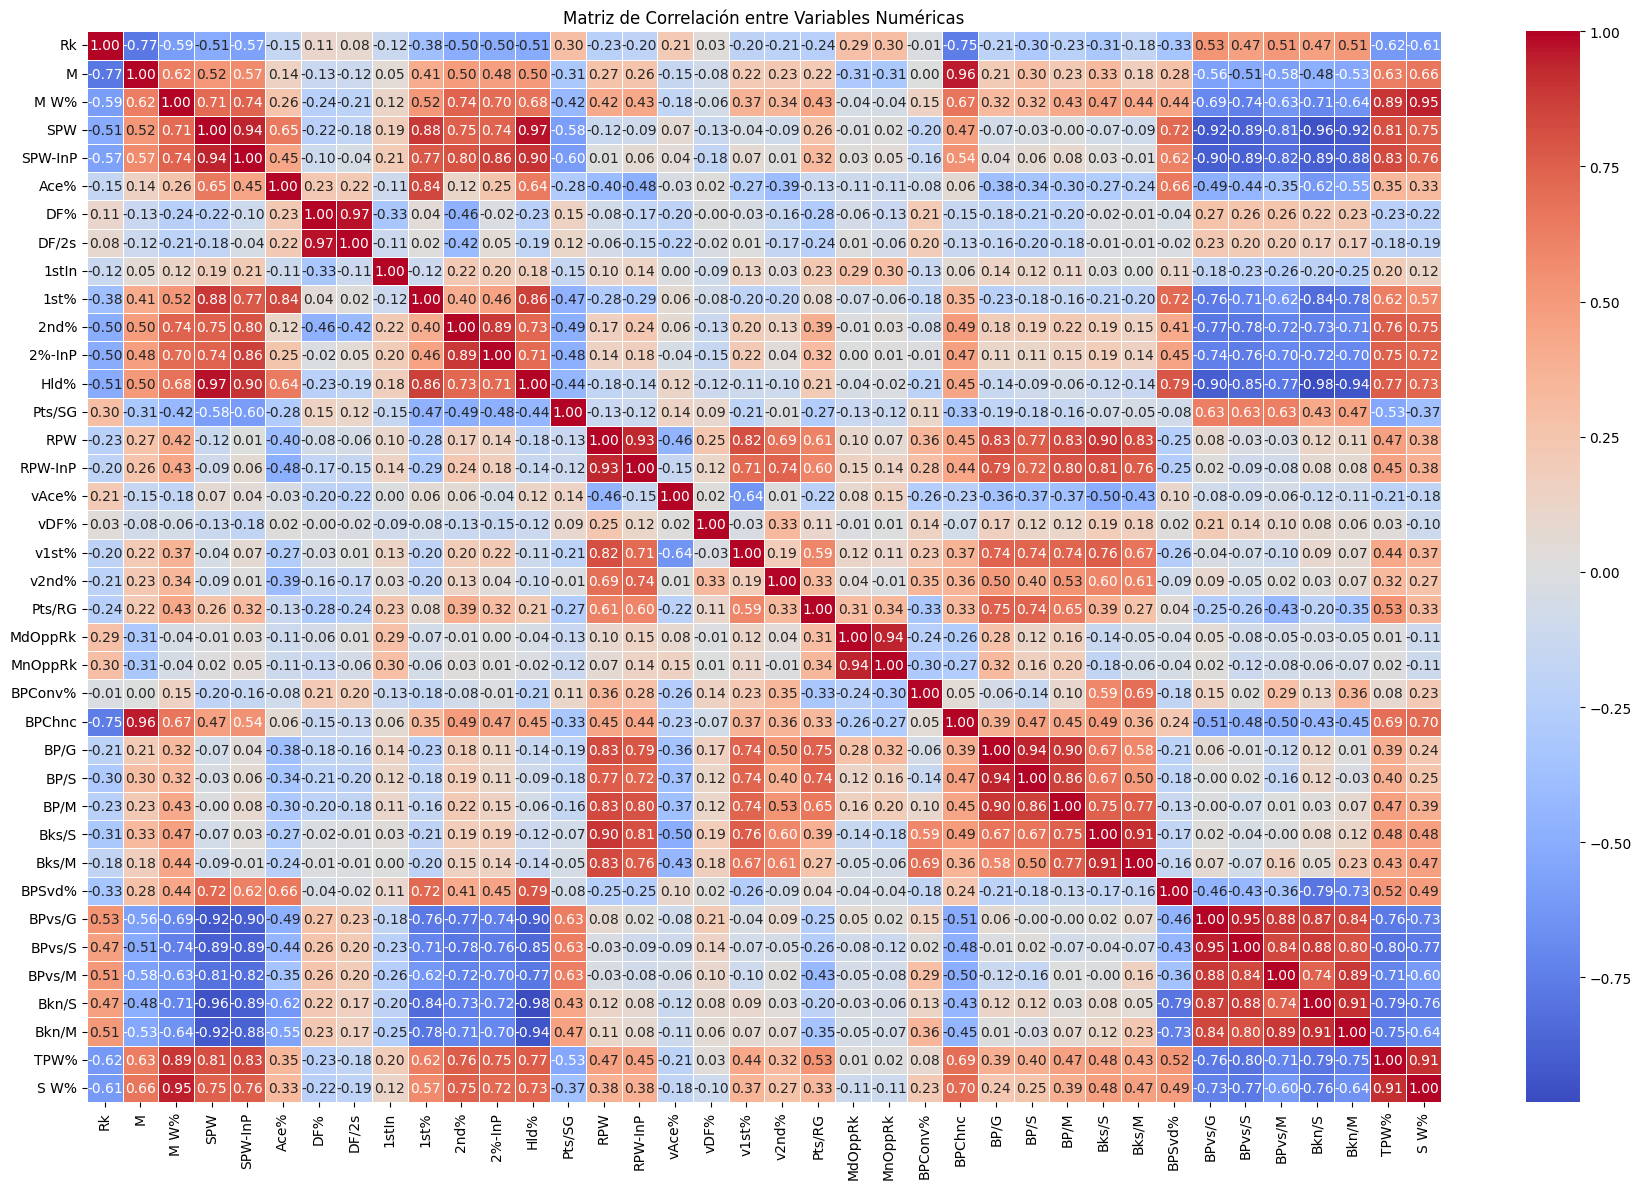

In [43]:
# Cargar el archivo
# df = pd.read_csv("Estadisticas_2024_limpio_2/estadisticas_generales_2024.csv")

# Eliminar columnas no numéricas o que contienen valores no convertibles directamente
df_clean = df.copy()

# # Quitar el símbolo '%' y convertir a float donde sea necesario
# df_clean = df_clean.replace('%', '', regex=True)

# # Convertir columnas relevantes a numéricas si es posible
# for col in df_clean.columns:
#     try:
#         df_clean[col] = pd.to_numeric(df_clean[col])
#     except:
#         pass  # Mantener columnas que no pueden convertirse (como nombres de jugadores)

# Seleccionar solo columnas numéricas
df_numeric = df_clean.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
corr_matrix = df_numeric.corr()

# Dibujar el mapa de calor
plt.figure(figsize=(18, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.tight_layout()
plt.show()

In [37]:
#quiero guardar el csv limpio
df.to_csv(os.path.join(carpeta_salida, 'estadisticas_dura_2024.csv'), index=False)

In [ ]:

# Ruta de entrada y salida
carpeta_entrada = 'Estadisticas_2024'
carpeta_salida = 'Estadisticas_2024_limpio_2'

# Crear carpeta de salida si no existe
os.makedirs(carpeta_salida, exist_ok=True)

# Lista de columnas que deseas eliminar (puedes modificarla)
columnas_a_eliminar = ['Player_dup', 'M_dup', 'M W-L', 'Aces', 'DFs', 'Pts/SG', 'PtsL/SG', 'Pts/RG','PtsW/RG','MdOppRk','MnOppRk', 'BPConv', 'BPSaved', 'BPvs', 'DR', 'Points', 'TB W-L', 'TBs', 'TB/S', 'Sets', 'Set W-L', 'Gms', 'Game W-L', 'Time/Mt', 'Min/Set', 'Sec/Pt']
# 68-34= 34 columnas
# Procesar cada archivo CSV
# Procesar cada archivo CSV
for archivo in os.listdir(carpeta_entrada):
    if archivo.endswith('.csv'):
        ruta_entrada = os.path.join(carpeta_entrada, archivo)
        ruta_salida = os.path.join(carpeta_salida, archivo)

        # Leer CSV
        df = pd.read_csv(ruta_entrada)

        # Eliminar columnas duplicadas por nombre (quedarse con la primera)
        df = df.loc[:, ~df.columns.duplicated()]

        # Eliminar columnas con sufijos .1, .2, etc. (que vienen de duplicados)
        df = df.loc[:, ~df.columns.str.contains(r'\.\d+$')]

        # Limpieza de columnas y espacios
        df.columns = df.columns.str.strip()
        df = df.apply(lambda col: col.map(lambda x: x.strip() if isinstance(x, str) else x))

        # Reemplazar símbolos
        df = df.replace({'%': '', ',': '.'}, regex=True)

        # Convertir columnas a numérico donde sea posible
        for col in df.columns:
            try:
                df[col] = pd.to_numeric(df[col])
            except Exception:
                pass  # No se puede convertir, se deja como está
        

        # Eliminar columnas no deseadas si existen
        df = df.drop(columns=[col for col in columnas_a_eliminar if col in df.columns])

        # Limpiar la columna 'Player' quitando la nacionalidad entre corchetes
        if 'Player' in df.columns:
            df['Player'] = df['Player'].str.replace(r'\s*\[.*?\]', '', regex=True).str.strip()


        # Guardar el CSV limpio
        df.to_csv(ruta_salida, index=False)
        print(f'Archivo limpio guardado: {ruta_salida}')


Archivo limpio guardado: Estadisticas_2024_limpio_2\estadisticas_generales_2024.csv
Archivo limpio guardado: Estadisticas_2024_limpio_2\stats_best_of_3.csv
Archivo limpio guardado: Estadisticas_2024_limpio_2\stats_Clay.csv
Archivo limpio guardado: Estadisticas_2024_limpio_2\stats_cuartos.csv
Archivo limpio guardado: Estadisticas_2024_limpio_2\stats_final.csv
Archivo limpio guardado: Estadisticas_2024_limpio_2\stats_GrandSlams.csv
Archivo limpio guardado: Estadisticas_2024_limpio_2\stats_Grass.csv
Archivo limpio guardado: Estadisticas_2024_limpio_2\stats_Hard.csv
Archivo limpio guardado: Estadisticas_2024_limpio_2\stats_Masters.csv
Archivo limpio guardado: Estadisticas_2024_limpio_2\stats_r128.csv
Archivo limpio guardado: Estadisticas_2024_limpio_2\stats_r16.csv
Archivo limpio guardado: Estadisticas_2024_limpio_2\stats_r32.csv
Archivo limpio guardado: Estadisticas_2024_limpio_2\stats_r64.csv
Archivo limpio guardado: Estadisticas_2024_limpio_2\stats_semis.csv
Archivo limpio guardado: Est

Elimino las variables que son irrelevantes o tienen otra variable similar pero expresada de manera mas interesante como podria ser el ratio de esa variable.

Ahora con las estadisticas que nos hemos quedado, vamos a ver las correlaciones entre ellas, para ver si podemos eliminar alguna otra

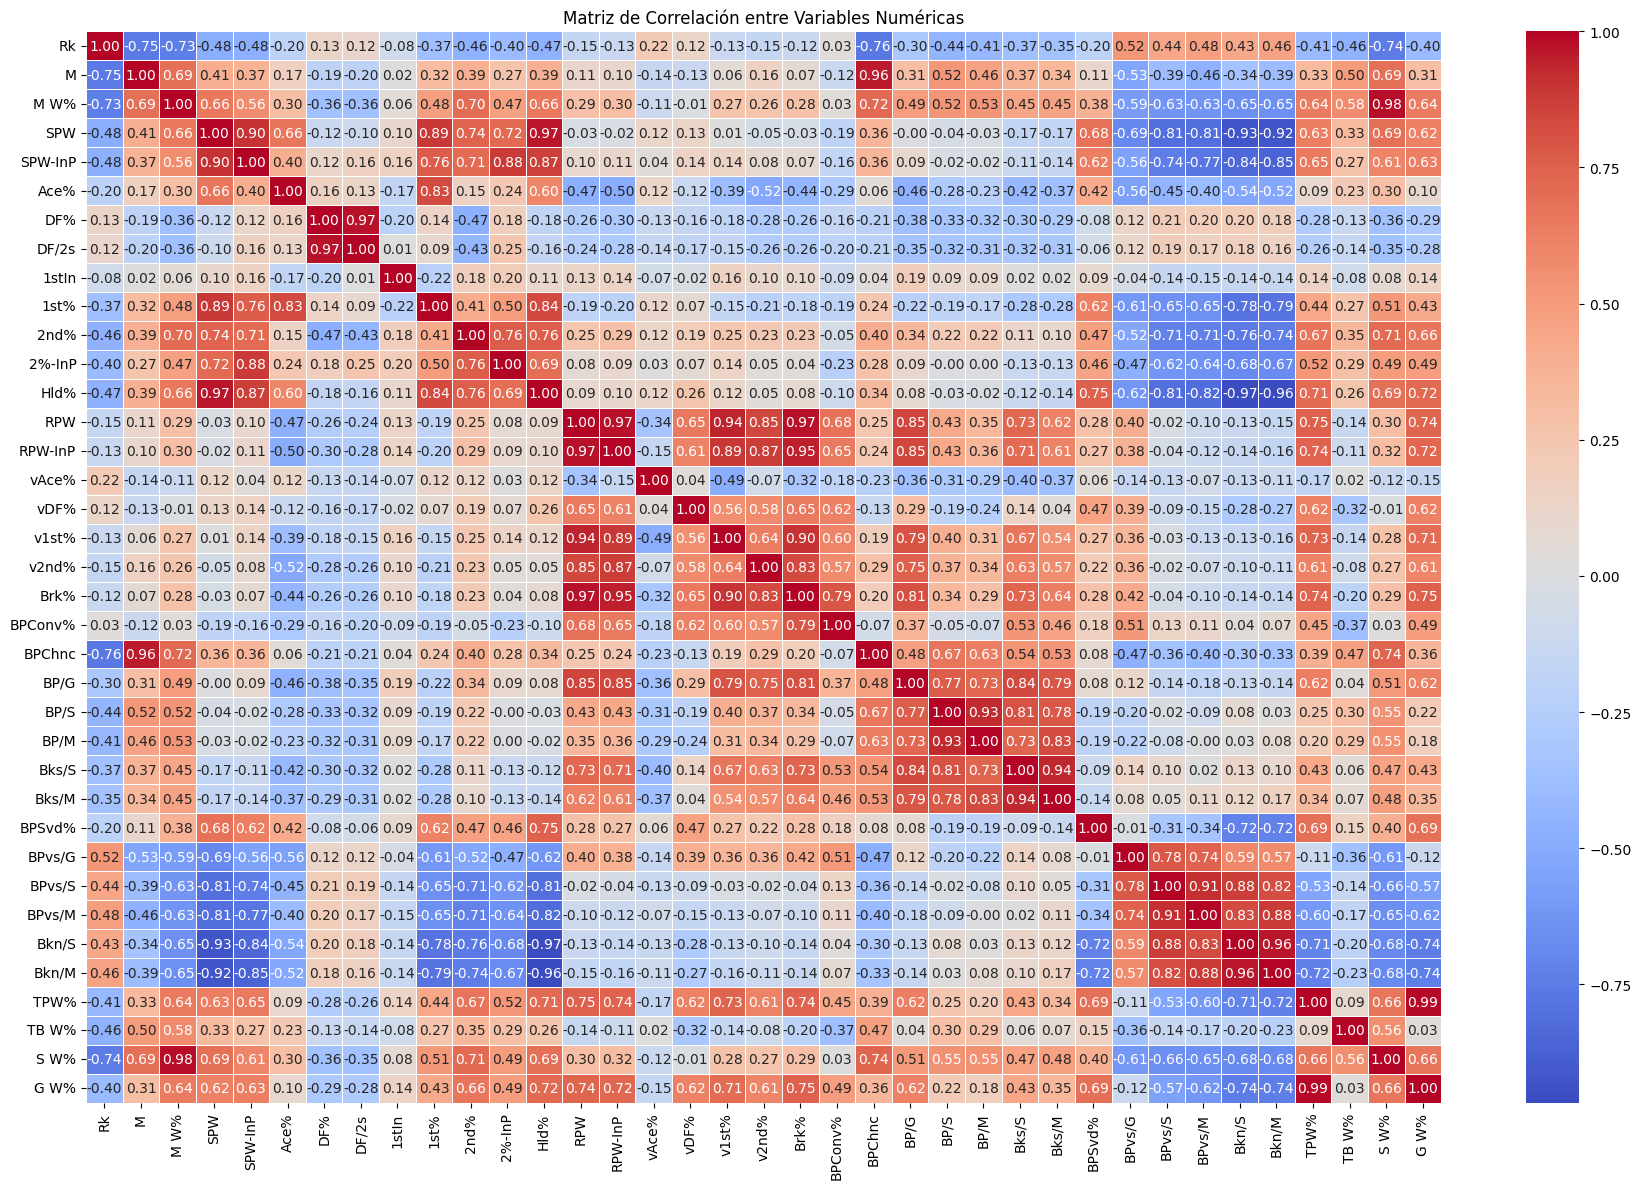

In [6]:
# Cargar el archivo
df = pd.read_csv("Estadisticas_2024_limpio_2/estadisticas_generales_2024.csv")

# Eliminar columnas no numéricas o que contienen valores no convertibles directamente
df_clean = df.copy()

# # Quitar el símbolo '%' y convertir a float donde sea necesario
# df_clean = df_clean.replace('%', '', regex=True)

# # Convertir columnas relevantes a numéricas si es posible
# for col in df_clean.columns:
#     try:
#         df_clean[col] = pd.to_numeric(df_clean[col])
#     except:
#         pass  # Mantener columnas que no pueden convertirse (como nombres de jugadores)

# Seleccionar solo columnas numéricas
df_numeric = df_clean.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
corr_matrix = df_numeric.corr()

# Dibujar el mapa de calor
plt.figure(figsize=(18, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.tight_layout()
plt.show()

M y BPChanc = 0.96, tiene sentido (no quiero utilizar BPChanc) me quedo con M de momento, quizas mas adelante la quite

M W% y S W% = 0.98, tiene sentido pero creo que prefiero dejar las dos, me quedo con M W% ya que SW% no es probabilidad de ganar el saque, es probabilidad de ganar el set, me quedo con la del partido

SPW con SPW_Inc(0.9), con 1st%, Hld%(0.97),  -->SPW y SPW_inc                                                       promediar

DF y DF/2= 0.98 o quito una o promedio-->                                                                    PROMEDIO

2nd% y 2nd-InC = 0.7, tenia pensado juntarlas, deberia? no

RPW y RPW ind= 0.97, tiene sentido, juntar y 0.97 ambas con brk%(que hago con esto),                        las juntos las 2 primeras

BKS/M y BKS/S, quitar unad de las dos

TPW% con G W%= 0.99, quitar una, quizas prefiero G W%, es mas importante, el tenis gana quien gane mas juegos, no mas puntos aunque uno conlleva al otro

columnas_a_eliminar = ['BPChanc', 'S W%','Bks/S, 'TP W%']


TODO ESTO SOLO PARA LOS MODELOS, PARA EL CLUSTER MEJOR SEPARADAS


Una vez que tenemos estas variables, vamos a fijarnos en las que estan correlacionas por encima de un 0.9



Variables con correlación baja con todas (ej., < 0.2 en todo) pueden no aportar valor:

Acción:
👉 Evalúa si deben eliminarse del análisis/modelo.


Busca pares con correlaciones cercanas a ±1. Ejemplos (según lo visible):

RPW y RPW-InP: ≈ 0.97-0.99 → Prácticamente duplicadas → puedes quedarte con una de ellas.

TPW% y G W%: ≈ 0.99-1.00 → Redundantes.

BPM, BPM/S, BPM/M → Correlación altísima entre sí → elige una sola.

Acción:
👉 Reduce la multicolinealidad eliminando una variable de cada grupo redundante.



In [11]:
df = pd.read_csv("Estadisticas_2024_limpio_2/stats_Hard.csv")

# Copiar el DataFrame original
df_transformed = df.copy()

# 1. Eliminar columnas específicas
columnas_a_eliminar = ['BPChanc', 'S W%', 'Bks/S', 'TP W%']
df_transformed = df_transformed.drop(columns=columnas_a_eliminar, errors='ignore')



# 2. Crear variables promediadas y eliminar las originales

# a) DF_avg = promedio de DFs y DF%
if 'DF/2s' in df.columns and 'DF%' in df.columns:
    df_transformed['DF_avg'] = (
        pd.to_numeric(df['DF/2s'], errors='coerce') + pd.to_numeric(df['DF%'], errors='coerce')
    ).div(2).round(1)
    df_transformed = df_transformed.drop(columns=['DF/2s', 'DF%'], errors='ignore')

# b) SPW_avg = promedio de SPW y SPW-InP
if 'SPW' in df.columns and 'SPW-InP' in df.columns:
    df_transformed['SPW_avg'] = (
        pd.to_numeric(df['SPW'], errors='coerce') + pd.to_numeric(df['SPW-InP'], errors='coerce')
    ).div(2).round(1)
    df_transformed = df_transformed.drop(columns=['SPW', 'SPW-InP'], errors='ignore')

# c) RPW_avg = promedio de RPW y RPW-InP
if 'RPW' in df.columns and 'RPW-InP' in df.columns:
    df_transformed['RPW_avg'] = (
        pd.to_numeric(df['RPW'], errors='coerce') + pd.to_numeric(df['RPW-InP'], errors='coerce')
    ).div(2).round(1)
    df_transformed = df_transformed.drop(columns=['RPW', 'RPW-InP'], errors='ignore')

# 3. Guardar el nuevo archivo CSV
df_transformed.to_csv("stats_Hard_2024_transformado.csv", index=False)